In [2]:
# First we need to import all of the packages we will be using!
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.stats import linregress

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Default Model
- Added code for tangent line

In [3]:
# Second model: includes synthesis and degradation
# This is the definition of our system of ODEs for the model
def second_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # PUT YOUR ODES below!!!
    # Hint: copy the ODEs from first_model and modify them to include synthesis and degradation
    
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar             + Q - S*delta
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS                 - KS*delta
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS     - Sstar*delta
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar - PSstar*delta
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS                 + KS*delta
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar     + PSstar*delta
    
    
    # your ODEs go above!
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime

In [3]:
# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 9.9
k_minus = 0.1
k_plus = 1
delta = 2e-5 # This is the value of delta we will use

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001

Q = delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)

In [40]:
print(len(r_values))
print(len(Sstar_results))
print(r_values[19])

50
50
1.9999999999999996


Slope of the tangent line: 0.18618659810504726


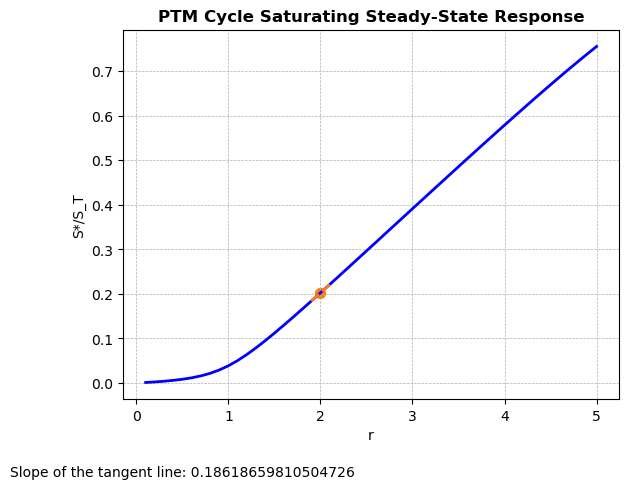

In [21]:
# PLOT your steady-state results
# Run this once for unsaturated, then change the block above and make a graph for saturated

#Get slope at middle point:

#r_val = 2.9
#r_val /= 50

# Define the r value
r_val = 2

# Find the index of the closest r value in r_values
index = (np.abs(np.array(r_values) - r_val)).argmin()

# Get the corresponding Sstar_result
y1 = Sstar_results[index]

# Define the line function for the tangent
def line(x, x1, y1):
    return (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1]) * (x - r_values[index]) + y1


xrange = np.linspace(r_values[index]-.1, r_values[index]+.1, 10)

plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.title('PTM Cycle Saturating Steady-State Response', weight = 'bold')
plt.scatter(r_val, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, r_val, y1), 'C1--', linewidth = 2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the slope of the tangent line
tangent_slope = (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1])
print("Slope of the tangent line:", tangent_slope)

plt.text(0.5, -0.2, f'Slope of the tangent line: {tangent_slope}', ha='center', va='center')
plt.show()

Scenario 1: Varying Delta

Slope of the tangent line: 2.987387960887849


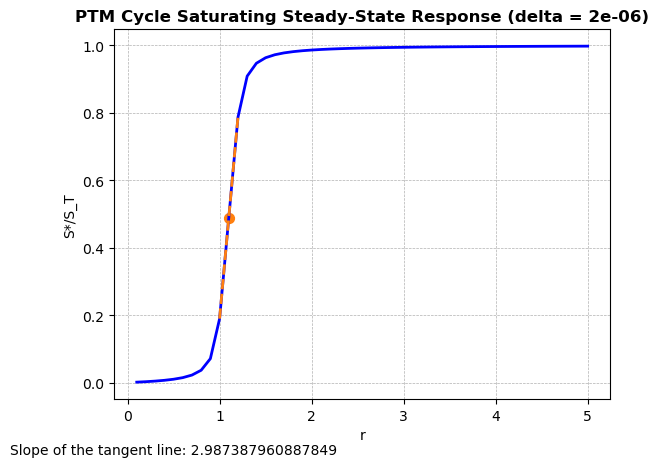

In [49]:
# Second model: includes synthesis and degradation
# This is the definition of our system of ODEs for the model
def second_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # PUT YOUR ODES below!!!
    # Hint: copy the ODEs from first_model and modify them to include synthesis and degradation
    
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar             + Q - S*delta
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS                 - KS*delta
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS     - Sstar*delta
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar - PSstar*delta
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS                 + KS*delta
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar     + PSstar*delta
    
    
    # your ODEs go above!
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime

# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 9.9
k_minus = 0.1
k_plus = 1
delta = 2e-6 # Default: 2e-5

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001

Q = delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)
    
# TESTING
# Run this once for unsaturated, then change the block above and make a graph for saturated

# Define the r value
r_val = 1.1

# Find the index of the closest r value in r_values
index = (np.abs(np.array(r_values) - r_val)).argmin()

# Get the corresponding Sstar_result
y1 = Sstar_results[index]

# Define the line function for the tangent
def line(x, x1, y1):
    return (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1]) * (x - r_values[index]) + y1


xrange = np.linspace(r_values[index]-.1, r_values[index]+.1, 10)

plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.title(f'PTM Cycle Saturating Steady-State Response (delta = {delta})', weight = 'bold')
plt.scatter(r_val, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, r_val, y1), 'C1--', linewidth = 2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the slope of the tangent line
tangent_slope = (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1])
print("Slope of the tangent line:", tangent_slope)

plt.text(0.5, -0.2, f'Slope of the tangent line: {tangent_slope}', ha='center', va='center')
plt.show()

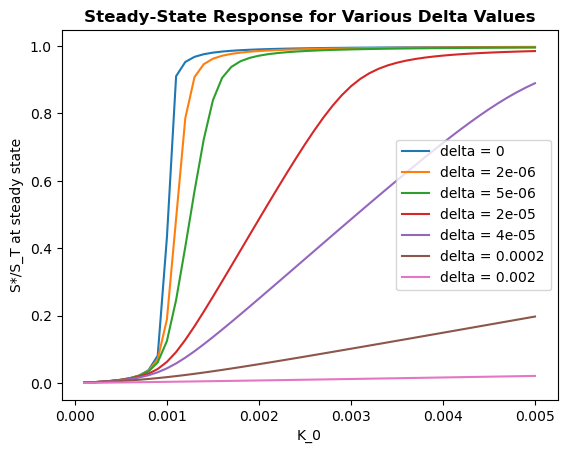

In [54]:
# Define delta values array
delta_values = [0, 2e-6, 0.5e-5, 2e-5, 4e-5, 2e-4, 2e-3]

fig, ax = plt.subplots()

# For each delta value:
for idx, delta in enumerate(delta_values):
    # Update Q based on current delta value
    Q = delta * S_0

    Sstar_results = []

    # Run simulation for each K_0 value
    for K_0 in K_values:
        states_0 = [S_0, 0.0, 0.0, 0.0, K_0, 0.001]
        t = np.linspace(0, 2000000, 2000)
        solution = odeint(second_model, states_0, t)
        Sstar_results.append(solution[-1, 2] / S_0)

    # Plot the results for the current delta value on the same axes
    ax.plot(K_values, Sstar_results, label=f'delta = {delta}')

# Set the title, labels and legend for the plot
ax.set_title('Steady-State Response for Various Delta Values', weight = 'bold')
ax.set_xlabel('K_0')
ax.set_ylabel('S*/S_T at steady state')
ax.legend()

# Display the plot
plt.show()

Scenario 2: Changing Enzyme Kinetics

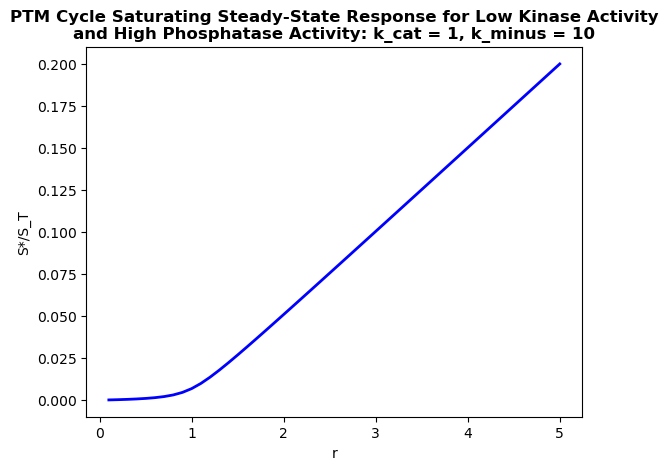

In [59]:
### SCENARIO 2: ENZYME KINETICS ###
# k_cat and k_plus modified

# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 1 #originally 9.9
k_minus = 0.1 #originally 0.1
k_plus = 1 #originally 1
delta = 2e-5 # This is the value of delta we will use

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001

Q = delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)
    
# PLOT your steady-state results
# Run this once for unsaturated, then change the block above and make a graph for saturated
plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.title('PTM Cycle Saturating Steady-State Response for Low Kinase Activity\nand High Phosphatase Activity: k_cat = 1, k_minus = 10', weight = 'bold')
plt.show()

/var/folders/mp/ryd5ss4935vbsfw5b9p_mfhh0000gn/T/ipykernel_2502/3328360546.py:19: RuntimeWarning: invalid value encountered in scalar divide
  r = k_cat*K_0 / (k_cat*P_0)


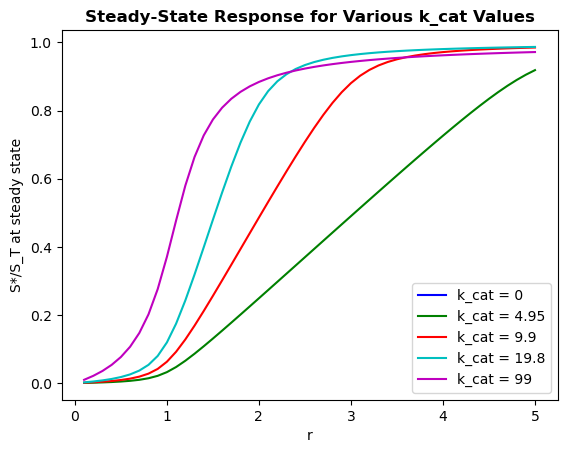

In [62]:
# Define delta values array
k_cat_values = [0, 4.95, 9.9, 19.8, 99]

# Define color array for different plots
colors = ['b', 'g', 'r', 'c', 'm']

fig, ax = plt.subplots()

# For each delta value:
for idx, k_cat in enumerate(k_cat_values):
    Sstar_results = []
    r_values = []

    # Run simulation for each K_0 value
    for K_0 in K_values:
        states_0 = [S_0, 0.0, 0.0, 0.0, K_0, 0.001]
        t = np.linspace(0, 2000000, 2000)
        solution = odeint(second_model, states_0, t)
        r = k_cat*K_0 / (k_cat*P_0)
        r_values.append(r)
        Sstar_results.append(solution[-1, 2] / S_0)

    # Plot the results for the current delta value on the same axes with different color
    ax.plot(r_values, Sstar_results, color=colors[idx], label=f'k_cat = {k_cat}')

# Set the title, labels and legend for the plot
ax.set_title('Steady-State Response for Various k_cat Values', weight = 'bold')
ax.set_xlabel('r')
ax.set_ylabel('S*/S_T at steady state')
ax.legend()

# Display the plot
plt.show()

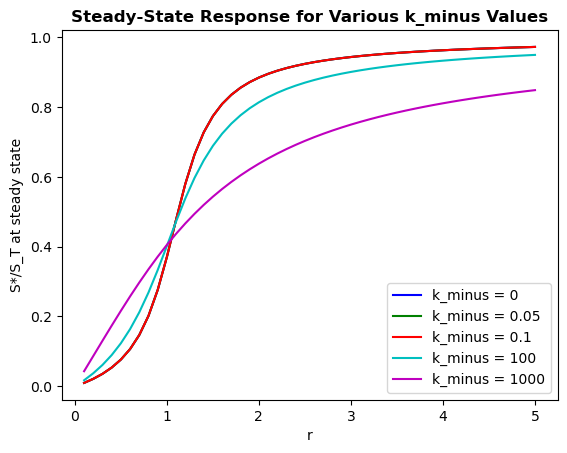

In [68]:
#Varying k_minus 

# 0.1
k_minus_values = [0, 0.05, 0.1, 100, 1000]

# Define color array for different plots
colors = ['b', 'g', 'r', 'c', 'm']

fig, ax = plt.subplots()

# For each k_minus value:
for idx, k_minus in enumerate(k_minus_values):
    Sstar_results = []
    r_values = []

    # Run simulation for each K_0 value
    for K_0 in K_values:
        states_0 = [S_0, 0.0, 0.0, 0.0, K_0, 0.001]
        t = np.linspace(0, 2000000, 2000)
        solution = odeint(second_model, states_0, t)
        r = k_cat*K_0 / (k_cat*P_0)
        r_values.append(r)
        Sstar_results.append(solution[-1, 2] / S_0)

    # Plot the results for the current k_minus value on the same axes with different color
    ax.plot(r_values, Sstar_results, color=colors[idx], label=f'k_minus = {k_minus}')

# Set the title, labels and legend for the plot
ax.set_title('Steady-State Response for Various k_minus Values', weight = 'bold')
ax.set_xlabel('r')
ax.set_ylabel('S*/S_T at steady state')
ax.legend()

# Display the plot
plt.show()

Slope of the tangent line: 0.28628193726380713


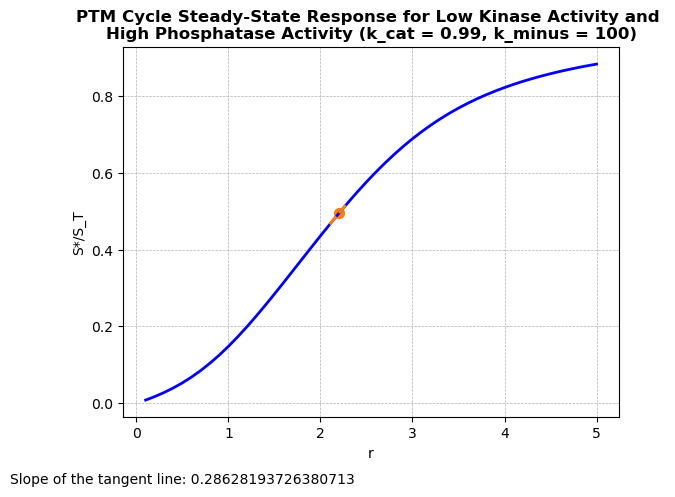

In [86]:
# Getting slope

# Second model: includes synthesis and degradation
# This is the definition of our system of ODEs for the model
def second_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # PUT YOUR ODES below!!!
    # Hint: copy the ODEs from first_model and modify them to include synthesis and degradation
    
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar             + Q - S*delta
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS                 - KS*delta
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS     - Sstar*delta
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar - PSstar*delta
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS                 + KS*delta
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar     + PSstar*delta
    
    
    # your ODEs go above!
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime

# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 0.99 #9.9
k_minus = 100 #0.1
k_plus = 1 #1
delta = 2e-6 # Default: 2e-5

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001

Q = delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)
    
# TESTING
# Run this once for unsaturated, then change the block above and make a graph for saturated

# Define the r value
r_val = 2.2

# Find the index of the closest r value in r_values
index = (np.abs(np.array(r_values) - r_val)).argmin()

# Get the corresponding Sstar_result
y1 = Sstar_results[index]

# Define the line function for the tangent
def line(x, x1, y1):
    return (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1]) * (x - r_values[index]) + y1


xrange = np.linspace(r_values[index]-.1, r_values[index]+.1, 10)

plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.title(f'PTM Cycle Steady-State Response for Low Kinase Activity and \nHigh Phosphatase Activity (k_cat = 0.99, k_minus = 100)', weight = 'bold')
plt.scatter(r_val, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, r_val, y1), 'C1--', linewidth = 2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the slope of the tangent line
tangent_slope = (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1])
print("Slope of the tangent line:", tangent_slope)

plt.text(0.5, -0.2, f'Slope of the tangent line: {tangent_slope}', ha='center', va='center')
plt.show()

Scenario 3: Changing Initial Concentrations

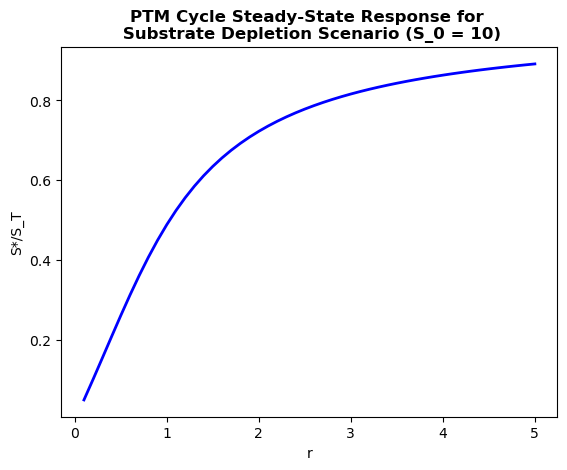

In [27]:
plot_title = "PTM Cycle Steady-State Response for \n Substrate Depletion Scenario (S_0 = 10)"

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 10      #1000
KS_0 = 00      #0.0
Sstar_0 = 0.0   #0.0
PSstar_0 = 0  #0.0
P_0 = 0.001     #0.001

# This is the definition of our system of ODEs for the model
def second_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # PUT YOUR ODES below!!!
    # Hint: copy the ODEs from first_model and modify them to include synthesis and degradation
    
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar             + Q - S*delta
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS                 - KS*delta
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS     - Sstar*delta
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar - PSstar*delta
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS                 + KS*delta
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar     + PSstar*delta
    
    
    # your ODEs go above!
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime

# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 9.9     #9.9
k_minus = 0.1   #0.1
k_plus = 1      #1
delta = 2e-5    #2e-5

Q = delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)

plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.title(plot_title, weight = 'bold')
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.show()

IndexError: list index out of range

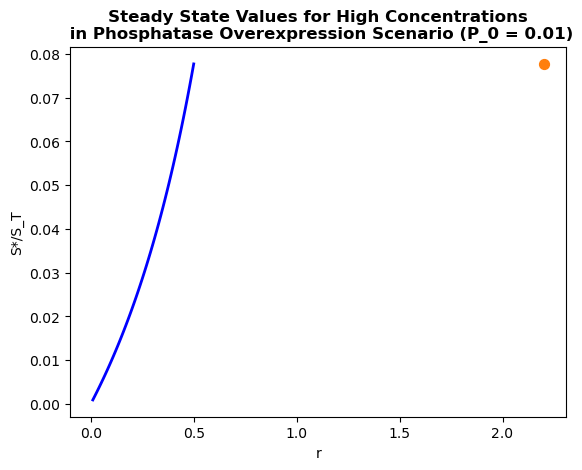

In [10]:
# Getting slope

# Second model: includes synthesis and degradation
# This is the definition of our system of ODEs for the model
def second_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # PUT YOUR ODES below!!!
    # Hint: copy the ODEs from first_model and modify them to include synthesis and degradation
    
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar             + Q - S*delta
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS                 - KS*delta
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS     - Sstar*delta
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar - PSstar*delta
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS                 + KS*delta
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar     + PSstar*delta
    
    
    # your ODEs go above!
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime

# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 0.99 #9.9
k_minus = 100 #0.1
k_plus = 1 #1
delta = 2e-6 # Default: 2e-5

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.01

Q = delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)
    
# TESTING
# Run this once for unsaturated, then change the block above and make a graph for saturated

# Define the r value
r_val = 2.2

# Find the index of the closest r value in r_values
index = (np.abs(np.array(r_values) - r_val)).argmin()

# Get the corresponding Sstar_result
y1 = Sstar_results[index]

# Define the line function for the tangent
def line(x, x1, y1):
    return (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1]) * (x - r_values[index]) + y1


xrange = np.linspace(r_values[index]-.1, r_values[index]+.1, 10)

plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.title(f'Steady State Values for High Concentrations\n in Phosphatase Overexpression Scenario (P_0 = 0.01)', weight = 'bold')
plt.scatter(r_val, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, r_val, y1), 'C1--', linewidth = 2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the slope of the tangent line
tangent_slope = (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1])
print("Slope of the tangent line:", tangent_slope)

plt.text(0.5, -0.2, f'Slope of the tangent line: {tangent_slope}', ha='center', va='center')
plt.show()